## Reference

This code is from the book - `deeplearning illustrated ch.11`

In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
output_dir = 'model_output/dense'

epochs = 4
batch_size = 128

n_dim = 64
n_unique_words = 5000
n_words_to_skip = 50
max_review_length = 100
pad_type = truc_type = 'pre'

n_dense = 64
dropout = 0.5

In [3]:
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data 
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words = n_unique_words, skip_top = n_words_to_skip)

## Check data format

In [4]:
word_index = keras.datasets.imdb.get_word_index()
word_index = {k:(v+3) for k, v in word_index.items()}
word_index["PAD"] = 0
word_index["START"] = 1
word_index["UNK"] = 2
index_word = {v:k for k, v in word_index.items()}

In [5]:
' '.join(index_word[id] for id in x_train[0])

"UNK UNK UNK UNK UNK brilliant casting location scenery story direction everyone's really suited UNK part UNK played UNK UNK could UNK imagine being there robert UNK UNK UNK amazing actor UNK now UNK same being director UNK father came UNK UNK same scottish island UNK myself UNK UNK loved UNK fact there UNK UNK real connection UNK UNK UNK UNK witty remarks throughout UNK UNK were great UNK UNK UNK brilliant UNK much UNK UNK bought UNK UNK UNK soon UNK UNK UNK released UNK UNK UNK would recommend UNK UNK everyone UNK watch UNK UNK fly UNK UNK amazing really cried UNK UNK end UNK UNK UNK sad UNK UNK know what UNK say UNK UNK cry UNK UNK UNK UNK must UNK been good UNK UNK definitely UNK also UNK UNK UNK two little UNK UNK played UNK UNK UNK norman UNK paul UNK were UNK brilliant children UNK often left UNK UNK UNK UNK list UNK think because UNK stars UNK play them UNK grown up UNK such UNK big UNK UNK UNK whole UNK UNK these children UNK amazing UNK should UNK UNK UNK what UNK UNK done do

In [6]:
(all_x_train, all_y_train), (all_x_valid, all_y_valid) = imdb.load_data()

' '.join(index_word[id] for id in all_x_train[0])

"START this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

## Preprocessing

In [7]:
# pad sequecnes to the same length
x_train = pad_sequences(x_train, maxlen = max_review_length, padding = pad_type, truncating = truc_type, value = 0)
x_valid = pad_sequences(x_valid, maxlen = max_review_length, padding = pad_type, truncating = truc_type, value = 0)

for x in x_train[0:6]:
    print(len(x))
    print(' '.join(index_word[id] for id in x))

100
cry UNK UNK UNK UNK must UNK been good UNK UNK definitely UNK also UNK UNK UNK two little UNK UNK played UNK UNK UNK norman UNK paul UNK were UNK brilliant children UNK often left UNK UNK UNK UNK list UNK think because UNK stars UNK play them UNK grown up UNK such UNK big UNK UNK UNK whole UNK UNK these children UNK amazing UNK should UNK UNK UNK what UNK UNK done don't UNK think UNK whole story UNK UNK lovely because UNK UNK true UNK UNK someone's life after UNK UNK UNK UNK UNK us UNK
100
funny UNK equal UNK UNK hair UNK big lots UNK UNK UNK men wear those cut UNK UNK UNK show off their UNK UNK UNK men actually wore them UNK UNK music UNK UNK UNK trash UNK plays over UNK over again UNK almost every scene there UNK trashy music UNK UNK UNK taking away bodies UNK UNK UNK still doesn't close UNK UNK UNK UNK aside UNK UNK UNK truly bad UNK whose only charm UNK UNK look back UNK UNK disaster UNK UNK UNK 80's UNK UNK UNK good old laugh UNK how bad everything UNK back then
100
touching U

## Simple Dense Model _ V1

In [8]:
model = Sequential()

# https://keras.io/api/layers/core_layers/embedding/ 
# https://analytics4everything.tistory.com/200 
# Inside Embedding layer, it generates one hot encoding (input_dim) and do lookup table op
model.add(
    Embedding(input_dim = n_unique_words, 
              output_dim = n_dim, 
              input_length = max_review_length))
model.add(Flatten())

model.add(Dense(n_dense, activation = 'relu'))
model.add(Dropout(dropout))

model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           320000    
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 64)                409664    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 729729 (2.78 MB)
Trainable params: 729729 (2.78 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
modelcheckpoint = ModelCheckpoint(filepath = output_dir + '/weights.{epoch:02d}.keras')

In [11]:
model.fit(x_train, 
          y_train, 
          batch_size = batch_size, 
          epochs = 10, 
          verbose = 1, 
          validation_data = (x_valid, y_valid),
         callbacks = [modelcheckpoint])

Epoch 1/10
196/196 [==============================] - 8s 29ms/step - loss: 0.5429 - accuracy: 0.6996 - val_loss: 0.3584 - val_accuracy: 0.8406
Epoch 2/10
196/196 [==============================] - 5s 24ms/step - loss: 0.2736 - accuracy: 0.8935 - val_loss: 0.3511 - val_accuracy: 0.8445
Epoch 3/10
196/196 [==============================] - 6s 30ms/step - loss: 0.1065 - accuracy: 0.9703 - val_loss: 0.4355 - val_accuracy: 0.8343
Epoch 4/10
196/196 [==============================] - 5s 27ms/step - loss: 0.0218 - accuracy: 0.9970 - val_loss: 0.5336 - val_accuracy: 0.8321
Epoch 5/10
196/196 [==============================] - 5s 25ms/step - loss: 0.0064 - accuracy: 0.9997 - val_loss: 0.6156 - val_accuracy: 0.8342
Epoch 6/10
196/196 [==============================] - 5s 25ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.6631 - val_accuracy: 0.8338
Epoch 7/10
196/196 [==============================] - 5s 26ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.6998 - val_accuracy: 0.8343

#### Validate v1

782/782 [==============================] - 2s 2ms/step


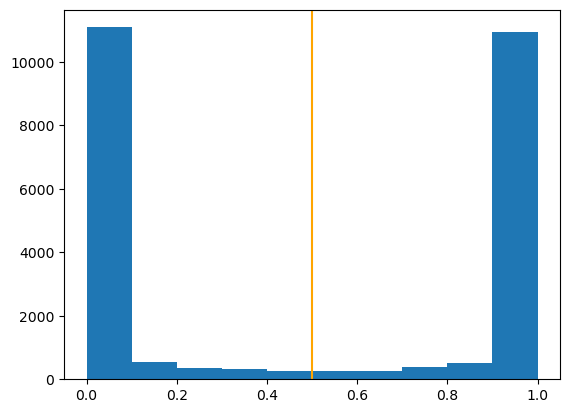

In [12]:
model.load_weights(output_dir + "/weights.10.keras")

y_hat = model.predict(x_valid)

import matplotlib.pyplot as plt
plt.hist(y_hat)
_ = plt.axvline(x = 0.5, color = 'orange')

In [13]:
!pip install sklearn

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve

_roc_score = roc_auc_score(y_valid, y_hat) * 100.0
print("roc socre : {:0.2f}".format(_roc_score))

roc socre : 91.73


In [15]:
!pip install pandas

In [16]:
import pandas as pd

float_y_hat = [ ]
for y in y_hat : 
    float_y_hat.append(y[0])
    
y_df = pd.DataFrame(list(zip(float_y_hat, y_valid)), columns = ['y_hat', 'y'])

In [17]:
y_df[(y_df.y == 0) & (y_df.y_hat > 0.9)].head(10)

,y_hat,y
8,0.980578,0
66,0.985132,0
75,0.999938,0
95,0.999587,0
112,0.995264,0
152,0.999995,0
156,0.999864,0
232,0.999742,0
256,0.999934,0
260,0.944926,0


In [18]:
' '.join(index_word[x] for x in all_x_valid[8])

"START hollywood had a long love affair with bogus arabian nights tales but few of these products have stood the test of time the most memorable were the jon hall maria montez films which have long since become camp this one is filled with dubbed songs anachronistic slang and slapstick it's a truly crop of corn and pretty near intolerable today it was nominated for its imaginative special effects which are almost unnoticeable in this day and age consisting mainly of trick photography the only outstanding positive feature which survives is its beautiful color and clarity sad to say of the many films made in this genre few of them come up to alexander korda's original thief of baghdad almost any other arabian nights film is superior to this one though it's a loser"

In [19]:
' '.join(index_word[x] for x in all_x_valid[75])

"START the adventures of hercules has to be one of the lamest excuses for a movie i've yet run across you would have to look far and wide to find anything that approaches the level of ineptness on display in this movie acting \x96 bad editing \x96 bad direction \x96 bad special effects \x96 bad and laughable plot \x96 bad lighting \x96 bad cinematography \x96 bad costume design \x96 bad and silly everything else \x96 bad watching the adventures of hercules is about as enjoyable as a root canal even for a fan of bad movies it's a real endurance test this is one for either masochists or lou ferrigno completists if any exist br br eight things i learned from watching the adventures of hercules br br 1 if you don't have the budget for real special effects rotoscope a scene from the previous movie it will look great trust me br br 2 when on a quest to recover take time for frequent stops to oil up you body it worked for ferrigno and his two amazon companions br br 3 any sword fight use of m

In [20]:
' '.join(index_word[x] for x in all_x_valid[95])

"START this is a disappointing adaptation of the james lee burke novel in the electric mist of the confederate dead it is rather poorly acted mainly due to the miscasting of the principal players tommy lee jones a normally fine actor just doesn't capture burke's dave as main nemesis john goodman does a sloppy job as the heavy the guy who plays actor buddy doesn't look like a former a lister leading man the rest of the movie is mainly cast with no name locals who just don't do justice to a big time novel br br the movie and jones' performance is way too hurried for one thing in burke's series of novels gives one the feeling that he fits well into his environment most of the time being laid back and slow moving this is just like the deep south and southern louisiana then at times is nearly manic in his jones just moves at a fast pace through the whole movie he doesn't vary ned beatty is wasted mary steenburgen is out of place about the only good thing about this is the setting on the who

## Simple Conv Dense model _ V2

In [21]:
from tensorflow import keras
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import SpatialDropout1D

In [22]:
max_review_length = 400

In [23]:
model = Sequential()

model.add(Embedding(input_dim = n_unique_words,
                   output_dim = n_dim,
                   input_length = max_review_length))
model.add(SpatialDropout1D(0.2))

# Conv1D : https://keras.io/api/layers/convolution_layers/convolution1d/ 
k_conv = 256  # filters (a.k.a kernels)
n_conv = 3    # kernel size
model.add(Conv1D(k_conv, n_conv, activation='relu'))
model.add(Conv1D(k_conv, n_conv, activation = 'relu'))
model.add(GlobalMaxPooling1D())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 400, 64)           320000    
                                                                 
 spatial_dropout1d (Spatial  (None, 400, 64)           0         
 Dropout1D)                                                      
                                                                 
 conv1d (Conv1D)             (None, 398, 256)          49408     
                                                                 
 conv1d_1 (Conv1D)           (None, 396, 256)          196864    
                                                                 
 global_max_pooling1d (Glob  (None, 256)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_2 (Dense)             (None, 256)              

#### Model Summary Notes

behind Params calualtion 
 * `embedding` :  n_unique_words(5000) * output_dim(64) 
 * `conv1d`  :  kernel_size(3*64) * kernel_count(256) + kernel_bias(256) = 49408
 * `dense_first` : input_dim(256) * output_dim(256) + output_bias(256) = 65892
 * `dense_second` : input_dim(256) * ouput_dim(1) + output_bias(1) = 257 

In [24]:
# update max_review_length to 400
x_train = pad_sequences(x_train, maxlen = max_review_length, padding = pad_type, truncating = truc_type, value = 0)
x_valid = pad_sequences(x_valid, maxlen = max_review_length, padding = pad_type, truncating = truc_type, value = 0)

In [25]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

output_dir = 'model_output/conv_dense'
modelcheckpoint = ModelCheckpoint(filepath = output_dir + '/weights.{epoch:02d}.keras') 

model.fit(x_train, 
          y_train, 
          batch_size = batch_size,
          epochs = 5, 
          verbose = 1, 
          validation_data = (x_valid, y_valid),
         callbacks = [modelcheckpoint])

Epoch 1/5
196/196 [==============================] - 253s 1s/step - loss: 0.5620 - accuracy: 0.6828 - val_loss: 0.4154 - val_accuracy: 0.8107
Epoch 2/5
196/196 [==============================] - 251s 1s/step - loss: 0.3694 - accuracy: 0.8382 - val_loss: 0.3838 - val_accuracy: 0.8272
Epoch 3/5
196/196 [==============================] - 251s 1s/step - loss: 0.2763 - accuracy: 0.8872 - val_loss: 0.3748 - val_accuracy: 0.8372
Epoch 4/5
196/196 [==============================] - 244s 1s/step - loss: 0.2017 - accuracy: 0.9238 - val_loss: 0.4252 - val_accuracy: 0.8302
Epoch 5/5
196/196 [==============================] - 250s 1s/step - loss: 0.1540 - accuracy: 0.9411 - val_loss: 0.5085 - val_accuracy: 0.8255


782/782 [==============================] - 57s 73ms/step


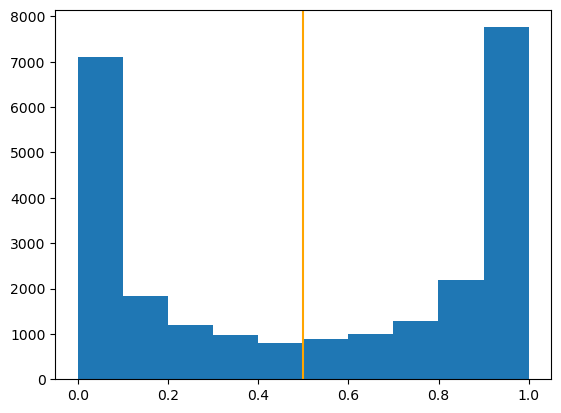

In [27]:
model.load_weights("model_output/conv_dense/weights.03.keras")

y_hat = model.predict(x_valid)

import matplotlib.pyplot as plt
plt.hist(y_hat)
_ = plt.axvline(x = 0.5, color = 'orange')

In [28]:
_roc_score = roc_auc_score(y_valid, y_hat) * 100.0
print("roc socre : {:0.2f}".format(_roc_score))

roc socre : 91.76
